In [1]:
# ignore warning
import warnings
warnings.filterwarnings("ignore")

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, cross_val_predict
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from scipy import stats
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier
# import lightgbm as lgb


import plotly.express as px
import plotly.graph_objects as go

sns.set()

In [2]:

data = pd.read_csv("heart.csv")

In [3]:
data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
data.thal.unique()

array([3, 2, 1, 0], dtype=int64)

In [5]:
data.ca.value_counts(),data.slope.value_counts(),data.thal.value_counts()


(0    578
 1    226
 2    134
 3     69
 4     18
 Name: ca, dtype: int64,
 1    482
 2    469
 0     74
 Name: slope, dtype: int64,
 2    544
 3    410
 1     64
 0      7
 Name: thal, dtype: int64)

##### Here in "thal" and "slope" 0 is more of an outlier

In [6]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### ANALYZING  THE DATA

In [7]:
data.age.unique()

array([52, 53, 70, 61, 62, 58, 55, 46, 54, 71, 43, 34, 51, 50, 60, 67, 45,
       63, 42, 44, 56, 57, 59, 64, 65, 41, 66, 38, 49, 48, 29, 37, 47, 68,
       76, 40, 39, 77, 69, 35, 74], dtype=int64)

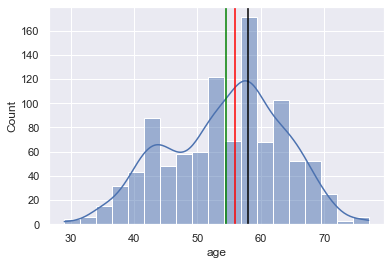

In [8]:
sns.histplot(data.age,kde=True)
plt.axvline(data.age.mean(), color = "green",label="Mean")
plt.axvline(data.age.median(), color = "red",label="Mean")
plt.axvline(data.age.mode().mean(), color = "black",label="Mode")


##### more of right skewed

In [9]:
data.age.mean(),data.age.std()

(54.43414634146342, 9.072290233244281)

here std is 9 and that means it is (9*2)18 units spread out and the data is clustered around mean

In [10]:
def plots(x,fig):
    plt.figure(figsize=(15,10))
    
    plt.subplot(4,2,fig)
    plt.title(x.upper(),fontsize=40,color="green")
    sns.histplot(data[x],kde=True)
    plt.axvline(data[x].mean(), color = "green",label="Mean")
    plt.axvline(data[x].median(), color = "red",label="Mean")
    plt.axvline(data[x].mode().mean(), color = "black",label="Mode")
    print(x,":mean",data[x].mean(),"std",data[x].std())


trestbps :mean 131.61170731707318 std 17.516718005376408
chol :mean 246.0 std 51.59251020618206
thalach :mean 149.11414634146342 std 23.005723745977196
oldpeak :mean 1.0715121951219524 std 1.175053255150173
thal :mean 2.32390243902439 std 0.620660238051028


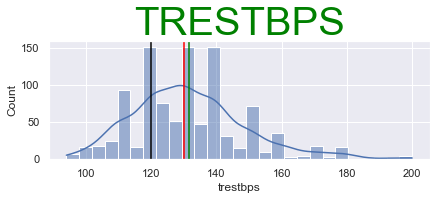

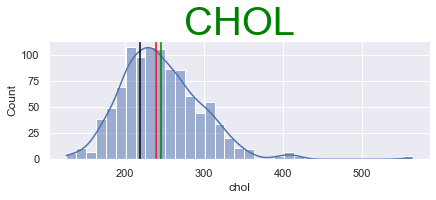

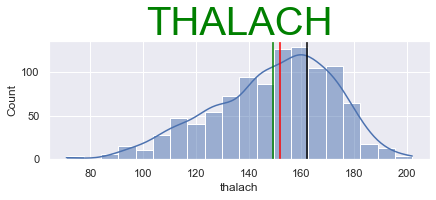

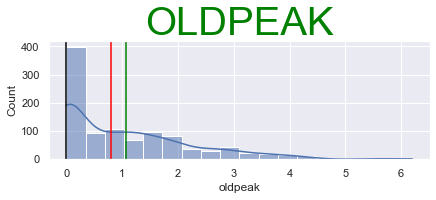

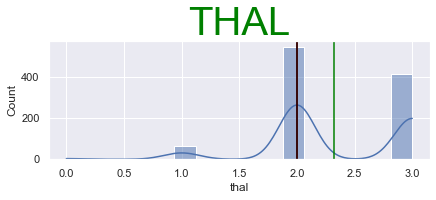

In [11]:
for i,j in enumerate(["trestbps","chol","thalach","oldpeak","thal"]):
    
    plots(j,i+1)

In [12]:
def plots(x,fig):
    plt.figure(figsize=(15,10))
    
    plt.subplot(4,2,fig)
    plt.title(x.upper(),fontsize=40,color="green")
    sns.boxplot(data[x])
    print(x,":mean",data[x].mean(),"std",data[x].std())


trestbps :mean 131.61170731707318 std 17.516718005376408
chol :mean 246.0 std 51.59251020618206
thalach :mean 149.11414634146342 std 23.005723745977196
oldpeak :mean 1.0715121951219524 std 1.175053255150173
thal :mean 2.32390243902439 std 0.620660238051028


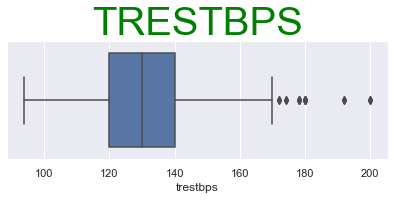

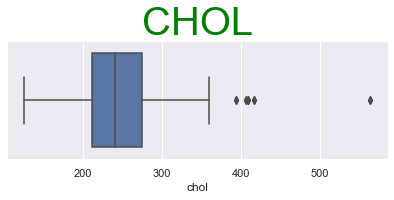

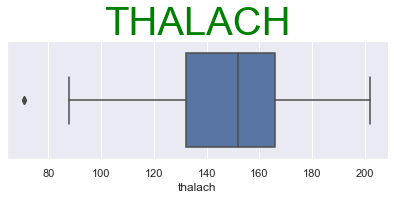

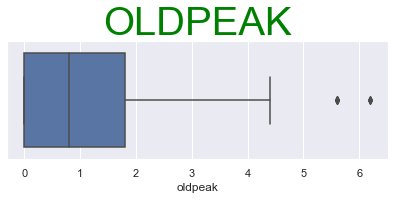

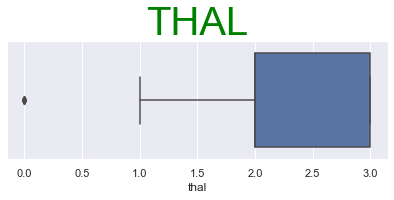

In [13]:
for i,j in enumerate(["trestbps","chol","thalach","oldpeak","thal"]):
    
    plots(j,i+1)

### 99.7 data 

In [14]:
dataset=data.copy()

def outliers(x,df):
    print(x)
    df=data[(data[x]>(data[x].mean()-3*data[x].std())) & (data[x]<(data[x].mean()+3*data[x].std()))]
    print(data[x].mean()+3*data[x].std(),"upper")
    print(data[x].mean()-3*data[x].std(),"low")
  
    return(df)


In [15]:
#dataset

In [16]:
#dataset[(dataset["trestbps"]>(dataset["trestbps"].mean()-3*dataset["trestbps"].std())) & (dataset["trestbps"]>(dataset["trestbps"].mean()+3*dataset["trestbps"].std()))]

## Not imbalanced

<AxesSubplot:>

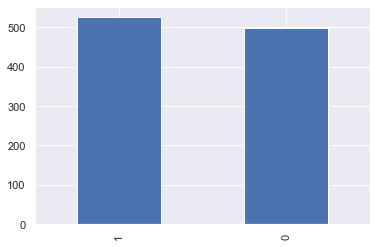

In [17]:
data["target"].value_counts().plot(kind="bar")

In [18]:

for i,j in enumerate(["trestbps","chol","thalach","oldpeak","thal"]):   
    df=outliers(j,data)
    data=df

trestbps
184.1618613332024 upper
79.06155330094396 low
chol
400.71467202717827 upper
90.7371943775369 low
thalach
218.14687585352104 upper
79.77949230568296 low
oldpeak
4.518717338301046 upper
-2.4220140415977482 low
thal
4.171939125081737 upper
0.4477791847774184 low


In [19]:
data=data.reset_index()

In [20]:

data=data.drop(columns=["index"])

In [55]:
y

0      0
1      0
2      0
3      0
4      0
      ..
982    1
983    0
984    0
985    1
986    0
Name: target, Length: 987, dtype: int64

#### now the data is without maximum outliers and I am not removing  "age" ones for now

In [54]:
X=data.drop(columns=["target"])
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
982,59,1,1,140,221,0,1,164,1,0.0,2,0,2
983,60,1,0,125,258,0,0,141,1,2.8,1,1,3
984,47,1,0,110,275,0,0,118,1,1.0,1,1,2
985,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, algorithm="brute")
#X=data.drop(columns=["target"])
scaler = StandardScaler()
X = scaler.fit_transform(X)
y=data["target"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=40)


In [23]:
X

array([[-0.24720974,  0.64345949, -0.92730254, ...,  0.98526196,
         1.23114363,  1.13968484],
       [-0.13769627,  0.64345949, -0.92730254, ..., -2.31119076,
        -0.72560156,  1.13968484],
       [ 1.72403272,  0.64345949, -0.92730254, ..., -2.31119076,
        -0.72560156,  1.13968484],
       ...,
       [-0.79477709,  0.64345949, -0.92730254, ..., -0.6629644 ,
         0.25277103, -0.5518474 ],
       [-0.46623668, -1.55409939, -0.92730254, ...,  0.98526196,
        -0.72560156, -0.5518474 ],
       [-0.0281828 ,  0.64345949, -0.92730254, ..., -0.6629644 ,
         0.25277103,  1.13968484]])

In [24]:
knn.fit(X_train,y_train)
print(knn.score(X_train,y_train))
y_pred=knn.predict(X_test)
print(knn.score(X_test,y_test))
print("accuracy")
print(classification_report(y_test, y_pred))


0.9556400506970849
0.8434343434343434
accuracy
              precision    recall  f1-score   support

           0       0.84      0.85      0.84        98
           1       0.85      0.84      0.84       100

    accuracy                           0.84       198
   macro avg       0.84      0.84      0.84       198
weighted avg       0.84      0.84      0.84       198



### here you can see there is change in overfitting lets apply other method

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, algorithm="brute")
# X=data.drop(columns=["target"])
# y=data["target"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=40)
knn.fit(X_train,y_train)
print(knn.score(X_train,y_train))
y_pred=knn.predict(X_test)
print(knn.score(X_test,y_test))
print("accuracy")
print(classification_report(y_test, y_pred))


0.9304347826086956
0.8552188552188552
accuracy
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       142
           1       0.86      0.86      0.86       155

    accuracy                           0.86       297
   macro avg       0.86      0.85      0.85       297
weighted avg       0.86      0.86      0.86       297



value of k=sqrt(sample)

In [26]:
import math
math.sqrt(len(data))

31.416556144810016

here i am working with k
what k is how many samples to take for mean
nearest_neighbors = new_df["price"].head(k)
predicted_price = nearest_neighbors.mean()

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3, algorithm="brute")
# X=data.drop(columns=["target"])
# y=data["target"]


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=40)
knn.fit(X_train,y_train)

print(knn.score(X_train,y_train))
y_pred=knn.predict(X_test)
print(knn.score(X_test,y_test))
print("accuracy")
print(classification_report(y_test, y_pred))

0.9898550724637681
0.9393939393939394
accuracy
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       142
           1       0.94      0.95      0.94       155

    accuracy                           0.94       297
   macro avg       0.94      0.94      0.94       297
weighted avg       0.94      0.94      0.94       297



#### without outlier removing it is giving bad accuracy.

In [28]:
def k_nn(n,algo):
    knn = KNeighborsClassifier(n_neighbors=n, algorithm="brute")
    knn.fit(X_train,y_train)
    print(knn.score(X_train,y_train))
    y_pred=knn.predict(X_test)
    print(knn.score(X_test,y_test))
   # print("accuracy")
   # print(classification_report(y_test, y_pred))

In [29]:
for i in range(1,10):
    print("iteration:", i)
    for j in ["brute","auto", "ball_tree", "kd_tree"]:
        print("algo:",j)
        k_nn(i,j)

iteration: 1
algo: brute
1.0
0.9865319865319865
algo: auto
1.0
0.9865319865319865
algo: ball_tree
1.0
0.9865319865319865
algo: kd_tree
1.0
0.9865319865319865
iteration: 2
algo: brute
0.9942028985507246
0.9595959595959596
algo: auto
0.9942028985507246
0.9595959595959596
algo: ball_tree
0.9942028985507246
0.9595959595959596
algo: kd_tree
0.9942028985507246
0.9595959595959596
iteration: 3
algo: brute
0.9898550724637681
0.9393939393939394
algo: auto
0.9898550724637681
0.9393939393939394
algo: ball_tree
0.9898550724637681
0.9393939393939394
algo: kd_tree
0.9898550724637681
0.9393939393939394
iteration: 4
algo: brute
0.9536231884057971
0.898989898989899
algo: auto
0.9536231884057971
0.898989898989899
algo: ball_tree
0.9536231884057971
0.898989898989899
algo: kd_tree
0.9536231884057971
0.898989898989899
iteration: 5
algo: brute
0.9304347826086956
0.8552188552188552
algo: auto
0.9304347826086956
0.8552188552188552
algo: ball_tree
0.9304347826086956
0.8552188552188552
algo: kd_tree
0.9304347826

as k is increasing the accuracy is performing worst and all of the algos works same on this dataset

#### theory for models:
    There are several algorithms that can be used to perform the nearest neighbor search in KNN, including:

Brute Force: This is the simplest and most straightforward algorithm. It simply calculates the distances between the test sample and all the training samples and selects the k nearest neighbors. Brute force is an exact search method, but its computational complexity is O(Nd), where N is the number of training samples and d is the number of features, making it impractical for large datasets.

K-Dimensional Tree: This is a space partitioning data structure that recursively splits the feature space into smaller subspaces to reduce the number of distance calculations. The search complexity of K-Dimensional Tree is O(log N), making it more efficient than brute force for large datasets.

Ball Tree: This is a variant of K-Dimensional Tree that uses spheres instead of hyper-rectangles to partition the feature space. Ball trees have been shown to be faster than K-Dimensional Trees for some datasets.

## Cross validation 



In [30]:
from sklearn.model_selection import cross_val_score
import numpy as np

In [31]:
scores1 = cross_val_score(KNeighborsClassifier(n_neighbors=2, algorithm="brute"),X,y, cv=10)
np.average(scores1)


0.9837456194599051

In [32]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [33]:
X.shape

(987, 13)

In [34]:
from sklearn.metrics import accuracy_score

no_splits = 10
kfold = KFold(n_splits=no_splits, shuffle=True, random_state=1)
counter = 0
models = {}
scores = []
model_s=[]
for train, test in kfold.split(X_train):
    counter += 1
    print(train.shape, test.shape)
    train_X, test_X = X[train], X[test]
    train_y, test_y = y[train], y[test]
    print(train_y.shape, train_y.shape)
    print("end")
#   fit model
    model =KNeighborsClassifier(n_neighbors=2, algorithm="brute")
    #print(train_X,train_y)
    model.fit(train_X, train_y)
    models[f"model{str(counter)}"] = model
#   evaluate model
    yhat = model.predict(test_X)
    acc = accuracy_score(test_y, yhat)
    model_s.append(model)
    scores.append(acc)


(621,) (69,)
(621,) (621,)
end
(621,) (69,)
(621,) (621,)
end
(621,) (69,)
(621,) (621,)
end
(621,) (69,)
(621,) (621,)
end
(621,) (69,)
(621,) (621,)
end
(621,) (69,)
(621,) (621,)
end
(621,) (69,)
(621,) (621,)
end
(621,) (69,)
(621,) (621,)
end
(621,) (69,)
(621,) (621,)
end
(621,) (69,)
(621,) (621,)
end


In [35]:
scores=pd.DataFrame(scores)
scores


,0
0,0.913043
1,0.927536
2,0.898551
3,0.971014
4,0.956522
5,0.913043
6,0.971014
7,0.913043
8,0.942029
9,0.913043


In [36]:
models

{'model1': KNeighborsClassifier(algorithm='brute', n_neighbors=2),
 'model2': KNeighborsClassifier(algorithm='brute', n_neighbors=2),
 'model3': KNeighborsClassifier(algorithm='brute', n_neighbors=2),
 'model4': KNeighborsClassifier(algorithm='brute', n_neighbors=2),
 'model5': KNeighborsClassifier(algorithm='brute', n_neighbors=2),
 'model6': KNeighborsClassifier(algorithm='brute', n_neighbors=2),
 'model7': KNeighborsClassifier(algorithm='brute', n_neighbors=2),
 'model8': KNeighborsClassifier(algorithm='brute', n_neighbors=2),
 'model9': KNeighborsClassifier(algorithm='brute', n_neighbors=2),
 'model10': KNeighborsClassifier(algorithm='brute', n_neighbors=2)}

In [37]:
models["model6"].predict(X_test)

array([0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1], dtype=int6

In [38]:
import pickle
with open('model_knn.pickle','wb') as f:
    mp=pickle.dump(models["model4"],f)


In [39]:

with open('model_knn.pickle','rb') as f:
    mp=pickle.load(f)


In [56]:
x=[[53,1,0,140,203,1,0,155,1,3.1,0,0,3],[52,1,0,125,212,0,1,168,0,1.0,2,2,3]]#ans=1,0

In [57]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [58]:
x

array([[ 1.,  0.,  0.,  1., -1.,  1., -1., -1.,  1.,  1., -1., -1.,  0.],
       [-1.,  0.,  0., -1.,  1., -1.,  1.,  1., -1., -1.,  1.,  1.,  0.]])

In [59]:
mp.predict(x)

array([0, 1], dtype=int64)

In [62]:
mp.predict([[ 1.,  0.,  0.,  1., -1.,  1., -1., -1.,  1.,  1., -1., -1.,  0.],[-1.,  0.,  0., -1.,  1., -1.,  1.,  1., -1., -1.,  1.,  1.,  0.]])



array([0, 1], dtype=int64)

In [307]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
983,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
984,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
985,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [311]:
#predicting those outliers

In [325]:
data2=dataset.copy()
#data2

In [327]:
df_test=dataset[(dataset["trestbps"]>(dataset["trestbps"].mean()-3*dataset["trestbps"].std())) & (dataset["trestbps"]>(dataset["trestbps"].mean()+3*dataset["trestbps"].std()))]

In [374]:
df_test2=dataset[(dataset["thal"]>(dataset["thal"].mean()-3*dataset["thal"].std())) & (dataset["thal"]>(dataset["thal"].mean()+3*dataset["thal"].std()))]

In [375]:
df_test=pd.concat([df_test,df_test2,dataset[(dataset["chol"]>(dataset["chol"].mean()-3*dataset["chol"].std())) & (dataset["chol"]>(dataset["chol"].mean()+3*dataset["chol"].std()))]],axis=0)

In [376]:
df_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
1,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
2,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
3,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
4,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
5,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
6,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
7,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
8,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
9,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0


<!-- ### restbps
184.1618613332024 upper
79.06155330094396 low
chol
400.71467202717827 upper
90.7371943775369 low
thalach
218.14687585352104 upper
79.77949230568296 low
oldpeak
4.518717338301046 upper
-2.4220140415977482 low
thal
4.171939125081737 upper
0.4477791847774184 low -->

In [379]:
df_test=df_test.reset_index()
df_test=df_test.drop(columns=["index"])
X=df_test.drop(columns=["target"])
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,54,1,1,192,283,0,0,195,0,0.0,2,1,3
1,56,0,0,200,288,1,0,133,1,4.0,0,2,3
2,54,1,1,192,283,0,0,195,0,0.0,2,1,3
3,56,0,0,200,288,1,0,133,1,4.0,0,2,3
4,54,1,1,192,283,0,0,195,0,0.0,2,1,3
5,56,0,0,200,288,1,0,133,1,4.0,0,2,3
6,56,0,0,200,288,1,0,133,1,4.0,0,2,3
7,65,0,2,140,417,1,0,157,0,0.8,2,1,2
8,67,0,2,115,564,0,0,160,0,1.6,1,0,3
9,56,0,0,134,409,0,0,150,1,1.9,1,2,3


In [380]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [381]:
predict=mp.predict(X)

In [385]:
predict

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1], dtype=int64)

In [382]:
y_test=df_test["target"]

In [383]:
y_test

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     1
8     1
9     0
10    1
11    0
12    1
13    0
14    0
15    1
16    0
17    0
18    1
19    0
20    1
21    1
22    1
Name: target, dtype: int64

In [384]:
from sklearn.metrics import accuracy_score

print('Model accuracy: {0:0.4f}'. format(accuracy_score(y_test, predict)))

Model accuracy: 1.0000


In [390]:
len(X)

23

In [438]:
import json
columns={
    "data_columns":[col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

In [ ]:
age	sex	cp	trestbps	chol	fbs	restecg	thalach	exang	oldpeak	slope	ca	thal	target
58	1	4	120	240	0	0	112	1	2.6	2	0	3	1
52	1	4	140	294	0	1	157	1	1.5	1	0	3	1
48	1	2	110	275	0	1	129	1	2.2	2	0	7	0
62	1	4	140	268	0	1	159	0	0.0	2	0	3	1
55	1	4	140	236	0	1	178	0	0.8	2	0	3	1
57	0	2	120	354	0	1	163	0	0.6	2	0	3	1
62	1	2	120	254	0	0	147	0	1.4	1	0	7	1
49	1	3	120	219	0	1	169	0	0.0	2	0	3	1
61	0	4	124	263	0	0	140	0	0.0	2	0	7	1
59	1	4	140	221	0	1	164	1	1.8	2	0	3	1


In [ ]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])


In [ ]:
62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
52,1,0,125,212,0,1,168,0,1.0,2,2,3,0